In [16]:
import yfinance as yahooFinance
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [49]:
def get_data(tickers, startDate, endDate):
    a1 = yahooFinance.Ticker(tickers[0]).history(start=startDate,end=endDate).reset_index()
    a2 = yahooFinance.Ticker(tickers[1]).history(start=startDate,end=endDate).reset_index()
    a3 = yahooFinance.Ticker(tickers[2]).history(start=startDate,end=endDate).reset_index()
    a4 = yahooFinance.Ticker(tickers[3]).history(start=startDate,end=endDate).reset_index()

    all_assets = [a1, a2, a3, a4]

    data = pd.DataFrame()
    for i, asset in enumerate(all_assets):
        asset = asset.reset_index()
        lb = tickers[i]
        data[lb] = asset['Close']
        
    data_w_ret = pd.concat([ data.iloc[1:], data.pct_change().iloc[1:] ], axis=1)
    data_w_ret.set_axis(tickers + [l + "_ret" for l in tickers], axis=1, inplace=True)
    ret_data = data_w_ret[[l + '_ret' for l in tickers]]
    return data, ret_data

In [50]:
tickers1 = ["VTI", "AGG", "DBC", "^VIX"]
startDate = datetime.datetime(2017,1,1)
endDate=datetime.datetime(2021,1,1)
_, ret1 = get_data(tickers1, datetime.datetime(2010,1,1), endDate)
tickers2 =['COPX', 'URA', 'LIT', 'REMX']
_, ret2 = get_data(tickers2, startDate, endDate)

/var/folders/tm/w_ghk37d14lgh4dy7_rf03240000gn/T/ipykernel_46997/473766261.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_w_ret.set_axis(tickers + [l + "_ret" for l in tickers], axis=1, inplace=True)
/var/folders/tm/w_ghk37d14lgh4dy7_rf03240000gn/T/ipykernel_46997/473766261.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_w_ret.set_axis(tickers + [l + "_ret" for l in tickers], axis=1, inplace=True)


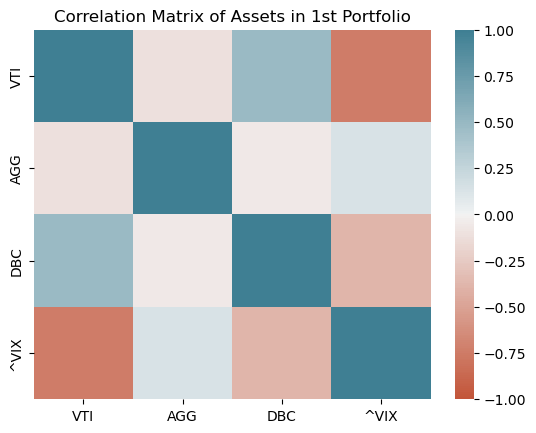

In [51]:
sns.heatmap(ret1.corr(), xticklabels=tickers1, yticklabels = tickers1, cmap=sns.diverging_palette(20, 220, n=200), vmin = -1, vmax = 1)
plt.title("Correlation Matrix of Assets in 1st Portfolio")
plt.savefig('corr1.png')
plt.show()

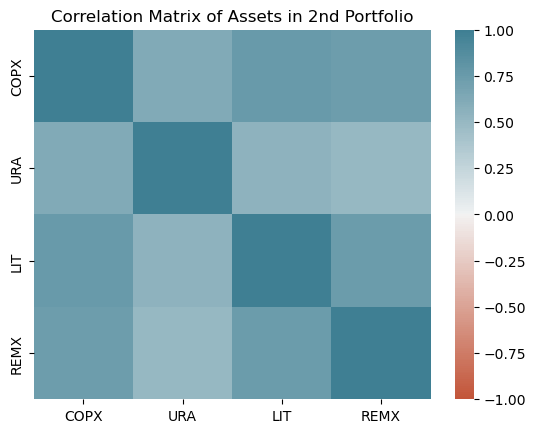

In [52]:
sns.heatmap(ret2.corr(), xticklabels=tickers2, yticklabels = tickers2, cmap=sns.diverging_palette(20, 220, n=200), vmin = -1, vmax = 1)
plt.title("Correlation Matrix of Assets in 2nd Portfolio")
plt.savefig('corr2.png')
plt.show()

/var/folders/tm/w_ghk37d14lgh4dy7_rf03240000gn/T/ipykernel_46997/473766261.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_w_ret.set_axis(tickers + [l + "_ret" for l in tickers], axis=1, inplace=True)


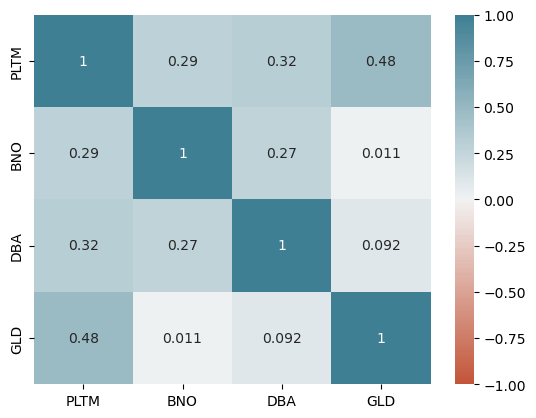

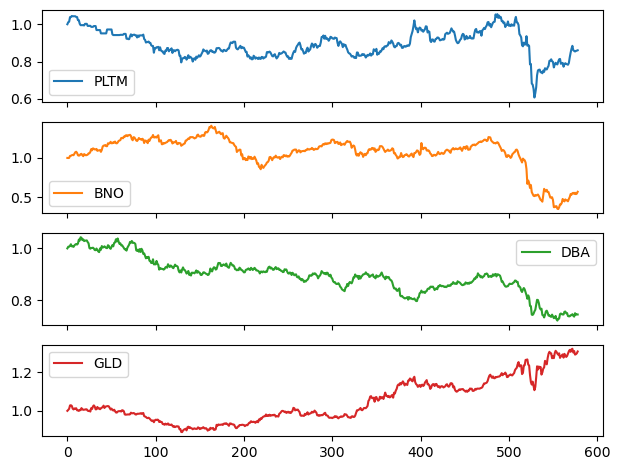

In [157]:
tickers3 = ['PLTM', 'BNO', 'DBA', 'GLD']
d3, ret3 = get_data(tickers3, datetime.datetime(2018,2,9), datetime.datetime(2020,6,1))
sns.heatmap(ret3.corr(), xticklabels=tickers3, yticklabels = tickers3, cmap=sns.diverging_palette(20, 220, n=200), vmin = -1, vmax = 1, annot=True)
plt.savefig('t8corr.png')

d3 = d3/d3.iloc[0]
d3.plot(subplots=True)

plt.tight_layout()
plt.savefig('t8prices.png')
plt.show()

In [121]:
d3

,PDBC,BNO,DBA,GLD
0,1.000000,1.000000,1.000000,1.000000
1,0.994851,0.995051,0.996780,0.987927
2,0.994851,0.990827,0.988909,0.983269
3,0.994059,0.994448,0.995707,0.977079
4,0.972673,0.999879,0.988909,0.984004
...,...,...,...,...
787,0.746096,0.258298,0.710555,0.724949
788,0.757297,0.254194,0.707692,0.720598
789,0.758835,0.264816,0.713417,0.707789
790,0.764325,0.255643,0.715206,0.718392


/var/folders/tm/w_ghk37d14lgh4dy7_rf03240000gn/T/ipykernel_46997/473766261.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_w_ret.set_axis(tickers + [l + "_ret" for l in tickers], axis=1, inplace=True)


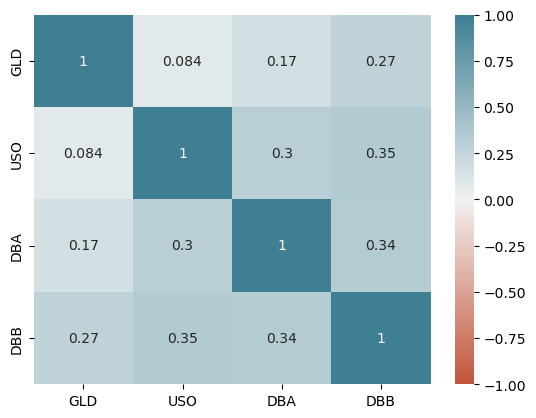

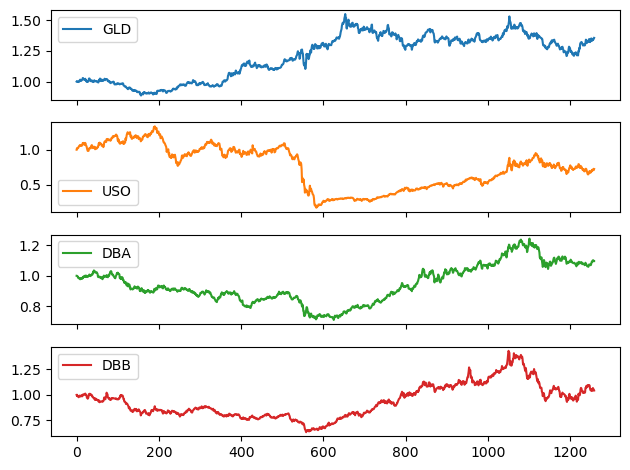

In [140]:
tickers3 = ['GLD','USO','DBA','DBB']
d3, ret3 = get_data(tickers3, datetime.datetime(2018,1,1), datetime.datetime(2023,1,1))
sns.heatmap(ret3.corr(), xticklabels=tickers3, yticklabels = tickers3, cmap=sns.diverging_palette(20, 220, n=200), vmin = -1, vmax = 1, annot=True)
plt.savefig('t8corr.png')

d3 = d3/d3.iloc[0]
d3.plot(subplots=True)

plt.tight_layout()
plt.savefig('t8prices.png')
plt.show()

/var/folders/tm/w_ghk37d14lgh4dy7_rf03240000gn/T/ipykernel_46997/473766261.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_w_ret.set_axis(tickers + [l + "_ret" for l in tickers], axis=1, inplace=True)


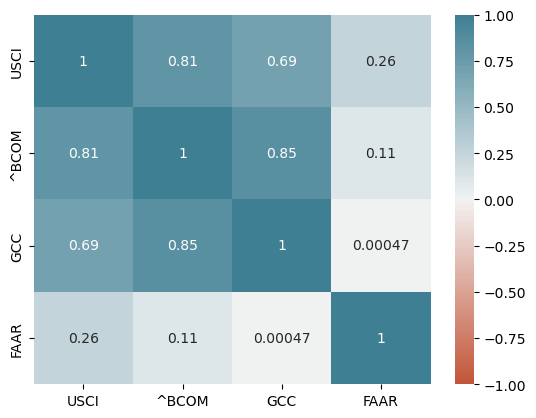

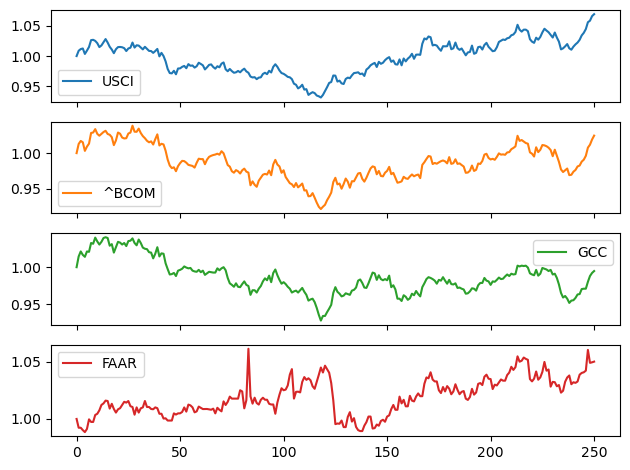

In [159]:
tickers3 = ['USCI','^BCOM','GCC','FAAR']
d3, ret3 = get_data(tickers3, datetime.datetime(2017,1,1), datetime.datetime(2018,1,1))
sns.heatmap(ret3.corr(), xticklabels=tickers3, yticklabels = tickers3, cmap=sns.diverging_palette(20, 220, n=200), vmin = -1, vmax = 1, annot=True)

d3 = d3/d3.iloc[0]
d3.plot(subplots=True)

plt.tight_layout()
plt.show()